# I Solving the Sum of Two Digits Programming Challenge

## C++

In [2]:
%%writefile APlusB.cpp
#include <iostream>

int sum_of_two_digits(int first_digit, int second_digit) {
    return first_digit + second_digit;
}

int main() {
    int a = 0;
    int b = 0;
    std::cin >> a;
    std::cin >> b;
    std::cout << sum_of_two_digits(a, b);
    return 0;
}

Writing APlusB.cpp


In [3]:
!g++ APlusB.cpp -o APlusB
!./APlusB

4  11
15

### Test input output files

In [4]:
%%writefile input1.txt
4 8

Writing input1.txt


In [5]:
%%writefile output1.txt
12

Writing output1.txt


In [6]:
%%writefile input2.txt
-5 9

Writing input2.txt


In [7]:
%%writefile output2.txt
4

Writing output2.txt


In [8]:
!./APlusB < input1.txt

12

In [9]:
!./APlusB < input2.txt

4

### Comparing files with grep

https://askubuntu.com/questions/546796/comparing-two-text-files

In [10]:
!grep -xvFf output1.txt output1.txt 

In [11]:
!grep -xvFf output1.txt output2.txt 

4


In [12]:
!grep -xvFf output2.txt output1.txt 

12


In [13]:
!./APlusB < input1.txt> ctest1.txt
!grep -xvFf output1.txt ctest1.txt

In [14]:
!./APlusB < input2.txt > ctest2.txt
!grep -xvFf output2.txt ctest2.txt

## Python

In [15]:
%%writefile sum.py
# python3

def sum_of_two_digits(first_digit, second_digit):
    return first_digit + second_digit

if __name__ == '__main__':
    a, b = map(int, input().split())
    print(sum_of_two_digits(a, b))

Writing sum.py


In [16]:
!python sum.py

20  6
26


In [17]:
!python sum.py  < input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

In [18]:
!python sum.py  < input2.txt> ptest2.txt
!grep -xvFf output2.txt ptest2.txt

# II Solving The Maximum Pairwise Product Programming Challenge in C++

## C++

In [19]:
%%writefile max_pairwise_product.cpp
#include <iostream>
#include <vector>
#include <algorithm>

int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product.cpp


In [20]:
!g++ max_pairwise_product.cpp -o max_pairwise_product
!./max_pairwise_product

6
26 4 16 25 98 46
4508


### Test 1: Small numbers

In [21]:
%%writefile input1.txt
10
1 2 3 4 5 6 7 8 9 10

Overwriting input1.txt


In [22]:
!./max_pairwise_product < input1.txt

90


### Test 2: largest input numbers 200000 200000 in the input

In [23]:
%%writefile input2.txt
6
1 3 200000 9 200000 23

Overwriting input2.txt


In [24]:
!./max_pairwise_product < input2.txt

1345294336


Changing the variables to long long

In [25]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product_long.cpp


In [26]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!./max_pairwise_product_long < input1.txt
!./max_pairwise_product_long < input2.txt

90
40000000000


### Test 3  stress tests 20  times  random n in [2, 20] 

In [70]:
%%writefile Test3Write.cpp

#include <iostream>
#include <fstream>
#include <cstdlib>
#include <ctime>

using namespace std;

int main() {
  // Create and open a text file
  ofstream MyFile("input4.txt");
  srand(time(NULL));
 int random1= rand()% (20-2+1) + 2;
 MyFile << random1 <<"\n";  // n 
 for (int i=0; i < random1; i++){
     srand(time(NULL)+i);
     int random2=  rand()% 200000;
     MyFile << random2 <<" ";
 }
  
  // Close the file
  MyFile.close();
}

Overwriting Test3Write.cpp


In [76]:
#1
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [77]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input4.txt

27930045200

real	0m0.003s
user	0m0.001s
sys	0m0.002s


In [78]:
#2
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [79]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input4.txt

27922022048

real	0m0.004s
user	0m0.003s
sys	0m0.001s


In [81]:
#3
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [82]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input4.txt

31038982355

real	0m0.003s
user	0m0.001s
sys	0m0.002s


In [83]:
#4
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [84]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input4.txt

36268974183

real	0m0.004s
user	0m0.002s
sys	0m0.002s


In [85]:
#5
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [86]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input4.txt

15274756640

real	0m0.004s
user	0m0.001s
sys	0m0.003s


In [87]:
#6
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [88]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input4.txt

14015678136

real	0m0.005s
user	0m0.000s
sys	0m0.004s


In [89]:
#7
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [90]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input4.txt

29136402806

real	0m0.003s
user	0m0.002s
sys	0m0.001s


In [91]:
#8
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [92]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input4.txt

32453119817

real	0m0.008s
user	0m0.002s
sys	0m0.003s


In [93]:
#9
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [94]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input4.txt

36633672090

real	0m0.004s
user	0m0.000s
sys	0m0.004s


In [95]:
#10
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [96]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input4.txt

31658765768

real	0m0.004s
user	0m0.002s
sys	0m0.002s


In [97]:
#11
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [98]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input4.txt

35162725836

real	0m0.003s
user	0m0.003s
sys	0m0.000s


In [99]:
#12
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [100]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input4.txt

30840162752

real	0m0.003s
user	0m0.002s
sys	0m0.001s


In [102]:
#13
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [103]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input4.txt

32240409896

real	0m0.003s
user	0m0.001s
sys	0m0.002s


In [104]:
#14
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [105]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input4.txt

25986196648

real	0m0.003s
user	0m0.002s
sys	0m0.001s


In [106]:
#15
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [107]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input4.txt

38785810800

real	0m0.003s
user	0m0.001s
sys	0m0.002s


In [108]:
#16
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [109]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input4.txt

13896700722

real	0m0.005s
user	0m0.000s
sys	0m0.004s


In [110]:
#17
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [111]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input4.txt

32820534900

real	0m0.003s
user	0m0.002s
sys	0m0.001s


In [112]:
#18
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [113]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input4.txt

30611571829

real	0m0.003s
user	0m0.001s
sys	0m0.002s


In [114]:
#19
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [115]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input4.txt

13574052084

real	0m0.004s
user	0m0.001s
sys	0m0.003s


In [116]:
#20
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [117]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input4.txt

23638794738

real	0m0.005s
user	0m0.001s
sys	0m0.003s


### Test 4  time test  measure the execution time running with the the largest worst case file (200000 increasing numbers, 200000 and 200000 the end) 

In [56]:
%%writefile Test2Write.cpp

#include <iostream>
#include <fstream>
#include <cstdlib>

using namespace std;

int main() {
  // Create and open a text file
  ofstream MyFile("input3.txt");

 MyFile << 200000 <<"\n";  // n 
 for (int i=1; i < 200001; i++){
     MyFile << i <<" ";
 }
  
  // Close the file
  MyFile.close();
}

Overwriting Test2Write.cpp


In [57]:
!g++ Test2Write.cpp -o Test2Write
!./Test2Write

Measure time

https://askubuntu.com/questions/53444/how-can-i-measure-the-execution-time-of-a-terminal-process

In [58]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input3.txt

39999800000

real	2m9.094s
user	2m8.452s
sys	0m0.023s


##### Calculate  the number of instructions executed by the algorithm as a function of n, add in each line a comment with the number of instructions that are executed in that line 

```cpp
 int main() {                         //N inst exec by line executed  
   
    int n;                            //1                      
    std::cin >> n;                    //1
                                              
    std::vector<int> numbers(n);      //n    init vector
    .
    .
 }

```

In [118]:
%%writefile test_init_vectors.cpp
#include <iostream>
#include <vector>
#include <algorithm>
int main() {                                                               
    int n = 10;                                                                                                                            //1
    std::vector<int> numbers(n);                                            
    for (int i = 0; i < n; ++i) {                                           
        std::cout << numbers[i];                                             
    }

    std::cout << "\n";                       
    return 0;                                                              
}  

Writing test_init_vectors.cpp


In [119]:
!g++ test_init_vectors.cpp -o test_init_vectors
!./test_init_vectors

0000000000


In [120]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {              //N inst exec by line executed 
    long long max_product = 0LL;                                             //1                                          
	  long long aux_product = 0LL;                                             //1 
    int n = numbers.size();                                                  //1 
                                                                             
    for (int first = 0; first < n; ++first) {                                //1+2n  
        for (int second = first + 1; second < n; ++second) {                 //n + (n-1)n 
			       aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2 
            if (max_product < aux_product)  {                                //(n-1)n/2 
				        max_product = aux_product;                                   //[0, (n-1)n/2] 
             }
        }
    }
                                                                             // -------------- 
    return max_product;                                                      // 4 + 3n + [2(n-1)n, 2.5 (n-1)n] 
}

int main() {                                              //N inst exec by line executed 
    int n;                                                //1  
    std::cin >> n;                                        //1
    std::vector<int> numbers(n);                          //n
    for (int i = 0; i < n; ++i) {                         //1 + 2n
        std::cin >> numbers[i];                           //n
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";     //1 + 1  + 4 + 3n + [2(n-1)n, 2.5 (n-1)n]
    return 0;                                             // -------------- 
}                                                         // 9 + 7n + [2(n-1)n, 2.5 (n-1)n]


Overwriting max_pairwise_product_long.cpp


Count executed intructions in code and verify with inputs 1, 2 and 3

In [121]:
%%writefile max_pairwise_product_long_execints.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers, long long &execints) {              //N inst exec by line executed 
    
    long long m = 0LL;                                                       //1
    
    long long max_product = 0LL;                                             //1
    execints++;

	  long long aux_product = 0LL;                                             //1
    execints++;

    int n = numbers.size();                                                  //1 
    execints++;

    execints++;                                                                         
    for (int first = 0; first < n; ++first) {                                //1+2n  
        execints += 2;

        long long m = 0LL;

        execints++;                                    
        for (int second = first + 1; second < n; ++second) {                 //n+ (n-1)n 
            execints += 2;                                                

			      aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2 
            execints++; 

            execints++; 
            if ( max_product < aux_product)  {                               //(n-1)n/2 
                       
				        max_product = aux_product;                                   //[0, (n-1)n/2] 
                execints++; 
                m++;
             }
        }
        if ( (first <= 10) || (n- first <= 10)) std::cout << m << "\n";
    }
                                                                            // -------------- 
    return max_product;                                                     // 4 + 3n + [2(n-1)n, 2.5 (n-1)n] 
}

int main() {                                                 //N inst exec by line executed 
    long long execints =0LL;

    int n;                                                   //1
    execints++;                                                              
    
    std::cin >> n;                                           //1
    execints++;

    std::vector<int> numbers(n);                             //n
    execints += n;
    
    execints++;
    for (int i = 0; i < n; ++i) {                            //1 + 2n
        execints += 2;

        std::cin >> numbers[i];
        execints++;                                          //n
    }
    
    //std::cout << MaxPairwiseProduct(numbers) << "\n";      //1 + 1  + 4 + 3n + [2(n-1)n, 2.5 (n-1)n]

    execints++;
    int M = MaxPairwiseProduct(numbers,execints);

    execints++;
    std::cout <<  execints << "\n";                       
    return 0;                                                // -------------- 
}                                                            // 9 + 7n + [2(n-1)n, 2.5 (n-1)n]

Writing max_pairwise_product_long_execints.cpp


In [123]:
!g++ max_pairwise_product_long_execints.cpp -o max_pairwise_product_long_execints
!./max_pairwise_product_long_execints < input1.txt
!./max_pairwise_product_long_execints < input2.txt
!./max_pairwise_product_long_execints < input3.txt

9
5
4
3
2
2
2
2
1
0
289
2
1
2
0
0
0
116
199999
100000
66667
50000
40000
33334
28572
25000
22223
20000
18182
2
2
2
2
2
2
2
2
1
0
80003672077


The number of instructions executed by the algooirithm with a list of size $n$ is  

$$T = 9 + 7n + [2(n-1)n, 2.5 (n-1)n]$$

It depends on the size of the lists and  the order of the list.

For the input1.txt 
```
10
1 2 3 4 5 6 7 8 9 10
```
$$T = 9 + 7(10) + 2(9)(10) +  9 + 5 + 4 + 3 + 2 + 2 + 2 + 2 + 1 + 0  = 289 $$

For the input2.txt 
```
6
1 3 200000 9 200000 23
```
$$T = 9 + 7(6) + 2(5)(6)  +  2 + 1 + 2 + 0 + 0 + 0 = 116 $$


For the input3.txt that is the worst case (n=200000 and list in incresing order)

```
200000
1 2 3 4 5 6 7 8 9 10 ... 199998 199999 200000
```

$$
\begin{array}{ll}
T &= 9 + 7(200000) + (2)(199999)(200000)  + (199999 +
100000 + 66667 +50000 \cdots 2 + 2 + 1)\\
&= 80003672077  \\
  &< 9 + 7(200000) + (2.5)(199999)(200000) \\
  & = 100000900009
\end{array}
  $$

Calculate estimated time by instruction and number of instructions by second

In [124]:
# Estimated time by instruction

128/80003672077 


1.5999265618308827e-09

In [125]:
# Estimated number of instructions by second

1/(128/80003672077) 

625028688.1015625

### Efficient solution

Add in each line a coment with the number of intstrcution that are executed in that line

In [132]:
%%writefile geetsCode.cpp
// A O(n) C++ program to find maximum product pair in an array
#include<bits/stdc++.h>
#include<ctime>
using namespace std;
 
void maxProduct( long long arr[],long long n)
{
    if (n < 2)                                            //1
    {
        cout << "No pairs exists\n";
        return;
    }
 
    if (n == 2)                                           //1
    {
        cout << arr[0] << " " << arr[1] << endl;
        return;
    }
 
    // Iniitialize maximum and second maximum             //1
     long long posa = 0, posb = 0;
 
    // Iniitialize minimum and second minimum
     long long nega = 0, negb = 0;                        //1
 
    // Traverse given array
    for ( long long i = 0; i < n-1; i++)                  //n-1
    {
        // Update maximum and second maximum if needed
        if (arr[i] > posa)
        {
            posb = posa;
            posa = arr[i];
        }
        else if (arr[i] > posb)
            posb = arr[i];
 
        // Update minimum and second minimum if needed
        if (arr[i] < 0 && abs(arr[i]) > abs(nega))
        {
            negb = nega;
            nega = arr[i];
        }
        else if(arr[i] < 0 && abs(arr[i]) > abs(negb))
            negb = arr[i];
    }
 
    if (nega*negb > posa*posb)
        cout << "Max product pair is {" << nega << ", "
             << negb << "}"<<"\nEl producto es:"<<nega*negb;
    else
        cout << "Max product pair is {" << posa << ", "
             << posb << "}"<<"\nEl producto es:"<<posa*posb;
}
 
// Driver program to test above function
int main()
{
    unsigned t0, t1;
	
     long long tam=0;
    cin>>tam;
    cout<<"tam:"<<tam<<"\n";
     long long arr[tam];
    for( long long a=0;a<tam;a++){
    cin>>arr[a];	
	}
  
    maxProduct(arr, tam+1);
  
}

Overwriting geetsCode.cpp


Test with inputs 1 and 2



In [133]:
#input1
!g++ geetsCode.cpp -o geetsCode
!time ./geetsCode < input1.txt

tam:10
Max product pair is {10, 9}
El producto es:90
real	0m0.003s
user	0m0.001s
sys	0m0.002s


In [134]:
#input2
!g++ geetsCode.cpp -o geetsCode
!time ./geetsCode < input2.txt

tam:6
Max product pair is {200000, 200000}
El producto es:40000000000
real	0m0.005s
user	0m0.001s
sys	0m0.002s


Test and time it with input 3

In [136]:
#input3
!g++ geetsCode.cpp -o geetsCode
!time ./geetsCode < input3.txt

tam:200000
Max product pair is {200000, 199999}
El producto es:39999800000
real	0m0.074s
user	0m0.066s
sys	0m0.003s


20 stress tests

In [140]:
#1
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [141]:
!g++ geetsCode.cpp -o geetsCode
!time ./geetsCode < input4.txt

tam:14
Max product pair is {188678, 179606}
El producto es:33887700868
real	0m0.003s
user	0m0.002s
sys	0m0.001s


In [142]:
#2
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [143]:
!g++ geetsCode.cpp -o geetsCode
!time ./geetsCode < input4.txt

tam:9
Max product pair is {197893, 166402}
El producto es:32929790986
real	0m0.003s
user	0m0.001s
sys	0m0.002s


In [144]:
#3
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [145]:
!g++ geetsCode.cpp -o geetsCode
!time ./geetsCode < input4.txt

tam:11
Max product pair is {193897, 184881}
El producto es:35847871257
real	0m0.004s
user	0m0.002s
sys	0m0.001s


In [146]:
#4
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [147]:
!g++ geetsCode.cpp -o geetsCode
!time ./geetsCode < input4.txt

tam:17
Max product pair is {199423, 169124}
El producto es:33727215452
real	0m0.003s
user	0m0.002s
sys	0m0.001s


In [148]:
#5
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [149]:
!g++ geetsCode.cpp -o geetsCode
!time ./geetsCode < input4.txt

tam:19
Max product pair is {183487, 181489}
El producto es:33300872143
real	0m0.003s
user	0m0.002s
sys	0m0.001s


In [150]:
#6
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [151]:
!g++ geetsCode.cpp -o geetsCode
!time ./geetsCode < input4.txt

tam:14
Max product pair is {174064, 169053}
El producto es:29426041392
real	0m0.003s
user	0m0.000s
sys	0m0.003s


In [152]:
#7
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [153]:
!g++ geetsCode.cpp -o geetsCode
!time ./geetsCode < input4.txt

tam:3
Max product pair is {131333, 123064}
El producto es:16162364312
real	0m0.003s
user	0m0.002s
sys	0m0.001s


In [154]:
#8
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [155]:
!g++ geetsCode.cpp -o geetsCode
!time ./geetsCode < input4.txt

tam:17
Max product pair is {193231, 184382}
El producto es:35628318242
real	0m0.003s
user	0m0.001s
sys	0m0.002s


In [156]:
#8
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [157]:
!g++ geetsCode.cpp -o geetsCode
!time ./geetsCode < input4.txt

tam:16
Max product pair is {195675, 189982}
El producto es:37174727850
real	0m0.003s
user	0m0.000s
sys	0m0.003s


In [158]:
#9
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [159]:
!g++ geetsCode.cpp -o geetsCode
!time ./geetsCode < input4.txt

tam:9
Max product pair is {189085, 120106}
El producto es:22710243010
real	0m0.003s
user	0m0.002s
sys	0m0.001s


In [160]:
#10
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [161]:
!g++ geetsCode.cpp -o geetsCode
!time ./geetsCode < input4.txt

tam:8
Max product pair is {188366, 151364}
El producto es:28511831224
real	0m0.003s
user	0m0.001s
sys	0m0.002s


In [162]:
#11
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [163]:
!g++ geetsCode.cpp -o geetsCode
!time ./geetsCode < input4.txt

tam:11
Max product pair is {180270, 168584}
El producto es:30390637680
real	0m0.003s
user	0m0.000s
sys	0m0.003s


In [164]:
#12
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [165]:
!g++ geetsCode.cpp -o geetsCode
!time ./geetsCode < input4.txt

tam:2
Max product pair is {169850, 63155}
El producto es:10726876750
real	0m0.003s
user	0m0.002s
sys	0m0.001s


In [166]:
#13
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [167]:
!g++ geetsCode.cpp -o geetsCode
!time ./geetsCode < input4.txt

tam:15
Max product pair is {195281, 188691}
El producto es:36847767171
real	0m0.003s
user	0m0.002s
sys	0m0.001s


In [168]:
#14
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [169]:
!g++ geetsCode.cpp -o geetsCode
!time ./geetsCode < input4.txt

tam:4
Max product pair is {192177, 140782}
El producto es:27055062414
real	0m0.003s
user	0m0.001s
sys	0m0.002s


In [170]:
#15
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [171]:
!g++ geetsCode.cpp -o geetsCode
!time ./geetsCode < input4.txt

tam:7
Max product pair is {188032, 177293}
El producto es:33336757376
real	0m0.003s
user	0m0.002s
sys	0m0.001s


In [172]:
#16
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [173]:
!g++ geetsCode.cpp -o geetsCode
!time ./geetsCode < input4.txt

tam:17
Max product pair is {198706, 195341}
El producto es:38815428746
real	0m0.003s
user	0m0.001s
sys	0m0.002s


In [174]:
#17
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [175]:
!g++ geetsCode.cpp -o geetsCode
!time ./geetsCode < input4.txt

tam:5
Max product pair is {164548, 127493}
El producto es:20978718164
real	0m0.003s
user	0m0.001s
sys	0m0.002s


In [176]:
#18
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [177]:
!g++ geetsCode.cpp -o geetsCode
!time ./geetsCode < input4.txt

tam:16
Max product pair is {193726, 190914}
El producto es:36985005564
real	0m0.005s
user	0m0.001s
sys	0m0.002s


In [178]:
#19
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [179]:
!g++ geetsCode.cpp -o geetsCode
!time ./geetsCode < input4.txt

tam:17
Max product pair is {179277, 173148}
El producto es:31041453996
real	0m0.003s
user	0m0.001s
sys	0m0.002s


In [180]:
#20
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [181]:
!g++ geetsCode.cpp -o geetsCode
!time ./geetsCode < input4.txt

tam:17
Max product pair is {194553, 191147}
El producto es:37188222291
real	0m0.003s
user	0m0.001s
sys	0m0.002s


Count executed instructions in code and verify with inputs 1,2 and 3


In [265]:
%%writefile execIntsGeetsCode.cpp
// A O(n) C++ program to find maximum product pair in an array
#include<bits/stdc++.h>
#include<ctime>
using namespace std;
 
void maxProduct( long long arr[],long long n, long long execints)
{
 
    if (n < 2)                                            //1
    {
        cout << "No pairs exists\n";
        execints ++;
        return;
    }
 
    if (n == 2)                                           //1
    {
        cout << arr[0] << " " << arr[1] << endl;
        execints++;
        return;
    }
 
    // Iniitialize maximum and second maximum             //1
     long long posa = 0, posb = 0;
      execints++;
 
    // Iniitialize minimum and second minimum
     long long nega = 0, negb = 0;                        //1
      execints++;
 
    // Traverse given array
    for ( long long i = 0; i < n-1; i++)                  //n-1
    {
        execints++;
        // Update maximum and second maximum if needed
        if (arr[i] > posa)
        {
            posb = posa;
            posa = arr[i];
            execints++;
        }
        else if (arr[i] > posb)
            posb = arr[i];
            execints++;
        // Update minimum and second minimum if needed
        if (arr[i] < 0 && abs(arr[i]) > abs(nega))
        {
            negb = nega;
            execints++;
            nega = arr[i];
            execints++;
        }
        else if(arr[i] < 0 && abs(arr[i]) > abs(negb))
            negb = arr[i];
            execints++;
    }
 
    if (nega*negb > posa*posb){
        //cout << "Max product pair is {" << nega << ", "
            // << negb << "}"<<"\nEl producto es:"<<nega*negb;
        execints++;
        }
    else{
        //cout << "Max product pair is {" << posa << ", "
            // << posb << "}"<<"\nEl producto es:"<<posa*posb;
        execints++;
         }
    cout<<"Execints: "<<execints<<"\n";
  
}
 
// Driver program to test above function
int main()
{
    unsigned t0, t1;
    long long execints = 0LL;
     long long tam=0;                                                  //1
    execints++;
    cin>>tam;                                                          //1
    execints++;
    cout<<"tam:"<<tam<<"\n";
    execints++;                                                        //1
     long long arr[tam];                                               //1
    execints++;
    for( long long a=0;a<tam;a++){                                    //n+1
    cin>>arr[a];	
    execints++;
	}
  
    maxProduct(arr, tam+1, execints);
  
}

Overwriting execIntsGeetsCode.cpp


In [266]:
#input1
!g++ execIntsGeetsCode.cpp -o execIntsGeetsCode
!time ./execIntsGeetsCode < input1.txt

tam:10
Execints: 57

real	0m0.005s
user	0m0.002s
sys	0m0.002s


In [267]:
#input2
!g++ execIntsGeetsCode.cpp -o execIntsGeetsCode
!time ./execIntsGeetsCode < input2.txt

tam:6
Execints: 34

real	0m0.003s
user	0m0.002s
sys	0m0.001s


In [268]:
#input3
!g++ execIntsGeetsCode.cpp -o execIntsGeetsCode
!time ./execIntsGeetsCode < input3.txt

tam:200000
Execints: 1000007

real	0m0.065s
user	0m0.061s
sys	0m0.003s


Calculate estimated time by instruction and number of instructions by second

In [269]:
#Time by instruction input 1
0.03/57

0.0005263157894736842

In [270]:
#Instructions by second input 1
1/(0.03/57)

1900.0

In [272]:
#Time by instruction input 2
0.05/34

0.0014705882352941176

In [273]:
#Instructions by second input 2
1/(0.05/34)

680.0

In [275]:
#Time by instruction input 3
0.074/1000007

7.399948200362598e-08

In [276]:
#Instructions by second input 3
1/(0.074/1000007)

13513608.108108107

### Super efficient solution

Whitout storing the list in memory and whitout calling a function, add in each line a coment with the number of intstrcution that are executed in that line 

In [189]:
%%writefile superEfficient.cpp
/* Based on https://www.linkedin.com/pulse/lets-solve-maximum-pairwise-product-algorithm-problem-okpala, on April 10, 2021 by rsierraa. */

#include <cstdlib>
#include <iostream>
#include <vector>

using namespace std;

int main() {

    int max1 = 0;                                                               //1
    int max2 = 0;   
    int n;                                                                      //1
    cin >> n;                                                                   //1

    int element;
    for (int i = 0; i < n; ++i) {                                               //1 + 2n
        cin >> element;                                                         //1

      if (element > max1){                                                      //1
        max2 = max1;                                                            //[0, n]
        max1 = element;                                                         //[0, n]
      }

      else if (element > max2){                                                 //1
        max2 = element;                                                         //[0, n]
      }
    }

    cout << (long long) max1*max2 << "\n";                                      //1

    return 0;                                                                   
                                                                                // total 8 + 2n + [0, 3n]
}

Overwriting superEfficient.cpp


Test with inputs 1 and 2


 

In [190]:
#input1
!g++ superEfficient.cpp -o superEfficient
!time ./superEfficient < input1.txt

90

real	0m0.003s
user	0m0.001s
sys	0m0.002s


In [191]:
#input2
!g++ superEfficient.cpp -o superEfficient
!time ./superEfficient < input2.txt

40000000000

real	0m0.008s
user	0m0.001s
sys	0m0.003s


Test and time it with input 3

In [192]:
#input3
!g++ superEfficient.cpp -o superEfficient
!time ./superEfficient < input3.txt

39999800000

real	0m0.061s
user	0m0.058s
sys	0m0.003s


20 stress tests 

In [193]:
#1
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [194]:
!g++ superEfficient.cpp -o superEfficient
!time ./superEfficient < input4.txt

30393312521

real	0m0.003s
user	0m0.001s
sys	0m0.002s


In [195]:
#2
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [196]:
!g++ superEfficient.cpp -o superEfficient
!time ./superEfficient < input4.txt

36639271192

real	0m0.004s
user	0m0.000s
sys	0m0.004s


In [197]:
#3
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [198]:
!g++ superEfficient.cpp -o superEfficient
!time ./superEfficient < input4.txt

22585654756

real	0m0.004s
user	0m0.003s
sys	0m0.000s


In [199]:
#4
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [200]:
!g++ superEfficient.cpp -o superEfficient
!time ./superEfficient < input4.txt

34260728840

real	0m0.003s
user	0m0.001s
sys	0m0.002s


In [201]:
#5
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [202]:
!g++ superEfficient.cpp -o superEfficient
!time ./superEfficient < input4.txt

20379599128

real	0m0.014s
user	0m0.001s
sys	0m0.002s


In [203]:
#6
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [204]:
!g++ superEfficient.cpp -o superEfficient
!time ./superEfficient < input4.txt

22530464208

real	0m0.003s
user	0m0.001s
sys	0m0.002s


In [205]:
#7
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [206]:
!g++ superEfficient.cpp -o superEfficient
!time ./superEfficient < input4.txt

34957639505

real	0m0.005s
user	0m0.001s
sys	0m0.003s


In [207]:
#8
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [208]:
!g++ superEfficient.cpp -o superEfficient
!time ./superEfficient < input4.txt

33196542420

real	0m0.003s
user	0m0.000s
sys	0m0.003s


In [209]:
#9
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [210]:
!g++ superEfficient.cpp -o superEfficient
!time ./superEfficient < input4.txt

2479692852

real	0m0.003s
user	0m0.002s
sys	0m0.001s


In [211]:
#10
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [212]:
!g++ superEfficient.cpp -o superEfficient
!time ./superEfficient < input4.txt

28696452320

real	0m0.004s
user	0m0.002s
sys	0m0.002s


In [213]:
#11
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [214]:
!g++ superEfficient.cpp -o superEfficient
!time ./superEfficient < input4.txt

25256775912

real	0m0.003s
user	0m0.003s
sys	0m0.000s


In [216]:
#12
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [217]:
!g++ superEfficient.cpp -o superEfficient
!time ./superEfficient < input4.txt

34514864735

real	0m0.004s
user	0m0.000s
sys	0m0.003s


In [218]:
#13
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [219]:
!g++ superEfficient.cpp -o superEfficient
!time ./superEfficient < input4.txt

27399991160

real	0m0.004s
user	0m0.002s
sys	0m0.001s


In [220]:
#14
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [221]:
!g++ superEfficient.cpp -o superEfficient
!time ./superEfficient < input4.txt

1336839614

real	0m0.007s
user	0m0.004s
sys	0m0.001s


In [222]:
#15
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [223]:
!g++ superEfficient.cpp -o superEfficient
!time ./superEfficient < input4.txt

24133866972

real	0m0.003s
user	0m0.000s
sys	0m0.003s


In [225]:
#16
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [226]:
!g++ superEfficient.cpp -o superEfficient
!time ./superEfficient < input4.txt

39576327648

real	0m0.004s
user	0m0.002s
sys	0m0.001s


In [227]:
#17
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [228]:
!g++ superEfficient.cpp -o superEfficient
!time ./superEfficient < input4.txt

33184198840

real	0m0.003s
user	0m0.001s
sys	0m0.002s


In [229]:
#18
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [230]:
!g++ superEfficient.cpp -o superEfficient
!time ./superEfficient < input4.txt

9945443904

real	0m0.003s
user	0m0.001s
sys	0m0.002s


In [231]:
#19
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [232]:
!g++ superEfficient.cpp -o superEfficient
!time ./superEfficient < input4.txt

26761321800

real	0m0.003s
user	0m0.002s
sys	0m0.001s


In [233]:
#20
!g++ Test3Write.cpp -o Test3Write
!./Test3Write

In [234]:
!g++ superEfficient.cpp -o superEfficient
!time ./superEfficient < input4.txt

34966523488

real	0m0.004s
user	0m0.000s
sys	0m0.003s


Count executed instructions in code and verify with inputs 1,2 and 3

In [243]:
%%writefile super_countexecs.cpp

#include <cstdlib>
#include <iostream>
#include <vector>

using namespace std;

long long execints = 0LL;

int m;

int main() {

    int max1 = 0;                                                               //1
    execints++;
    int max2 = 0;                                                               //1
    execints++;
    int n, element;                                                             //2
    execints += 2;
    cin >> n;                                                                   //1
    execints++;

    execints++;
    for (int i = 0; i < n; ++i) {                                               //1 + 2n
        execints+= 2;
        cin >> element;                                                         //1
        execints++;
  
      if (element > max1){                                                      //1
        max2 = max1;                                                            //[0, n]
        execints++;
        max1 = element;                                                         //[0, n]
        execints++;
        m += 2;
      }

      else if (element > max2){                                                 //1
        max2 = element;                                                         //[0, n]
        execints++;
        m++;
      }
    }

    cout << m << "\n";


    execints++;
    //cout << (long long) max1 * max2 << "\n";                                    //1

    cout << execints << "\n";

    return 0;                                                                   //----------------------
                                                                                //10 + 2n + [0, 3n]
}

Overwriting super_countexecs.cpp


In [244]:
#input1
!g++ super_countexecs.cpp -o super_countexecs
!time ./super_countexecs < input1.txt

20
57

real	0m0.003s
user	0m0.001s
sys	0m0.002s


In [245]:
#input2
!g++ super_countexecs.cpp -o super_countexecs
!time ./super_countexecs < input2.txt

8
33

real	0m0.005s
user	0m0.002s
sys	0m0.002s


In [246]:
#input3
!g++ super_countexecs.cpp -o super_countexecs
!time ./super_countexecs < input3.txt

400000
1000007

real	0m0.066s
user	0m0.063s
sys	0m0.001s


Calculate estimated time by instruction and number of instructions by second

In [247]:
#input 1 time by instruction
0.03/57

0.0005263157894736842

In [248]:
#input2 time by instruction
0.008/33

0.00024242424242424242

In [249]:
#input3 time by instruction
0.061/1000007

6.099957300298898e-08

In [250]:
#Numbers of instructions by second input 1
1/(0.03/57)

1900.0

In [251]:
#Numbers of instructions by second input 2
1/(0.008/33)

4125.0

In [252]:
#Numbers of instructions by second input 3
1/(0.061/1000007)

16393557.37704918

## Python

Efficient cython file reading, string parsing, and array building

https://stackoverflow.com/questions/37219875/efficient-cython-file-reading-string-parsing-and-array-building



File PreProcessing With C and Cython

https://github.com/EveryTimeIWill18/Cython_Repo/blob/master/FastFileProcessingWithCython.ipynb



In [137]:
# A O(n) Python 3 program to find
# maximum product pair in an array

# Function to find maximum product
# pair in arr[0..n-1]
def maxProduct(arr, n):

	if (n < 2):
		print("No pairs exists")
		return

	if (n == 2):
		print(arr[0] ," " , arr[1])
		return

	# Iniitialize maximum and
	# second maximum
	posa = 0
	posb = 0

	# Iniitialize minimum and
	# second minimum
	nega = 0
	negb = 0

	# Traverse given array
	for i in range(n):
	
		# Update maximum and second
		# maximum if needed
		if (arr[i] > posa):
			posb = posa
			posa = arr[i]
		
		elif (arr[i] > posb):
			posb = arr[i]

		# Update minimum and second
		# minimum if needed
		if (arr[i] < 0 and abs(arr[i]) > abs(nega)):
			negb = nega
			nega = arr[i]
		
		elif(arr[i] < 0 and abs(arr[i]) > abs(negb)):
			negb = arr[i]

	if (nega * negb > posa * posb):
		print("Max product pair is {" ,
				nega ,", ", negb , "}","\nel producto es",nega*negb)
	else:
		print( "Max product pair is {" ,
				posa ,", " ,posb , "}","\nel producto es",posb*posa)


# Driver Code
if __name__ =="__main__":
	arr = [1, 4, 3, 6, 7, 0]
	n = len(arr)
	maxProduct(arr, n)

# This code is contributed
# by ChitraNayal


Max product pair is { 7 ,  6 } 
el producto es 42


In [139]:
import time
lista=[]
f = open ('input3.txt','r')
a=f.readline()
B=f.readline()
print(lista)
for x in B.split():
  lista.append(int(x))
inicio = time.time()
maxProduct(lista,len(lista))
fin = time.time()
print("el tiempo de ejecucion es de:",fin-inicio)

[]
Max product pair is { 200000 ,  199999 } 
el producto es 39999800000
el tiempo de ejecucion es de: 0.05421018600463867


# Screenhsoots of the Coursera Submissions in C++ and Python

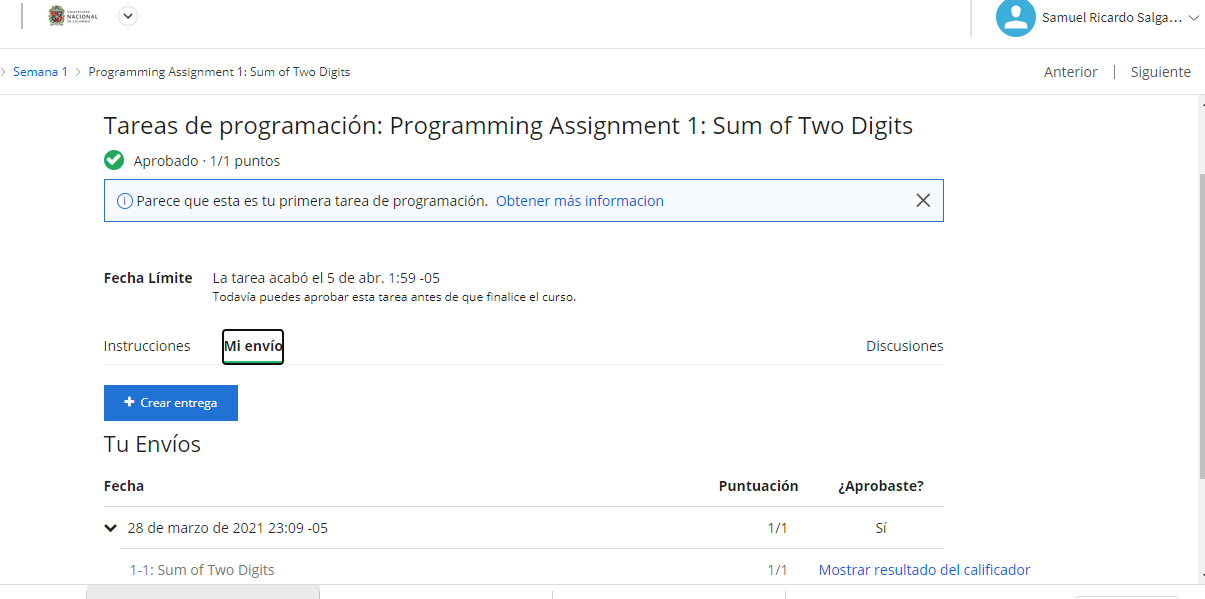

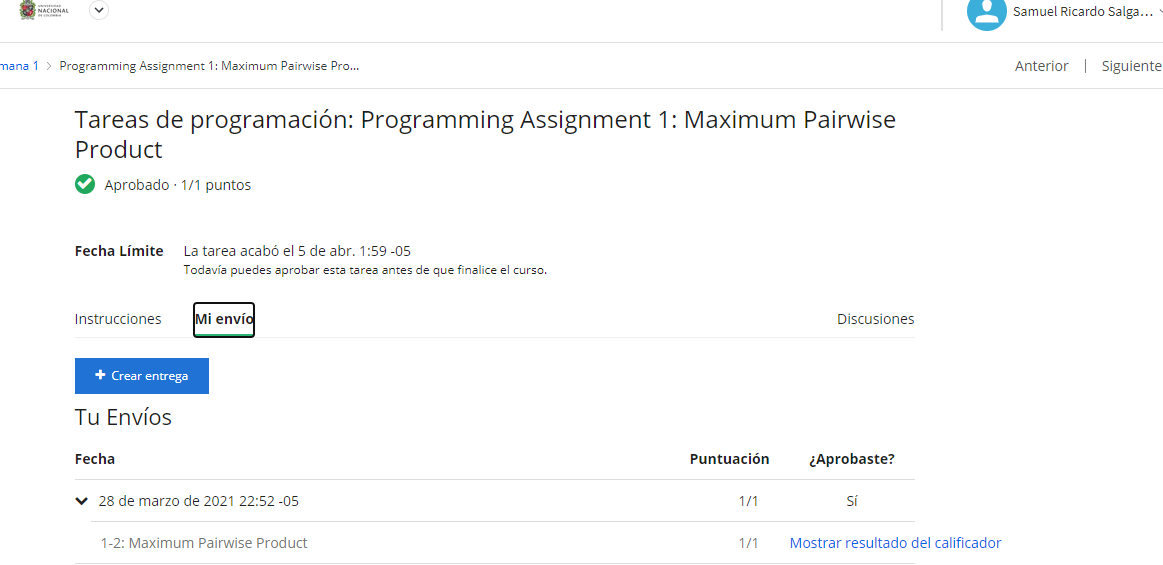